 ## JHG DATA ANALYSIS 2022

### INTRODUCTION

JHG have implemented a program in Kenya where they are giving HIV preventive medicine for free to anyone in need. The pill, called DP, must be taken daily to be effective. JHG is seeing a much lower uptake and demand for the pills than they had expected. They have concluded that it must be a behavioral problem, since they have made the pills entirely free and easily accessible in hundreds of clinics across the country. This analysis seeks to find out the reasons why.

In [14]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df=pd.read_excel(r'C:\Users\Sherry\Downloads\DP_continuation.xlsx')
df.head()

,clientsid,Gender,CountyOfBirth,Age,EntryPoint,ReferredOrTransferredFrom,InitialVisitDate,BP,Weight_,Height,SignOfSti,Lmp,Cluster,FacilityType,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
0,10269-07-1/18,M,Kisii,38.0,Referred,VCT Site,2018-03-14,113/82,68.0,172.0,No,1900-01-01,Nairobi,Public,1.0,1.0,1.0,1.0,1.0,0.0
1,10269-07-2/18,F,Meru,44.0,Referred,VCT Site,2018-04-11,120/84,102.0,168.0,No,1900-01-01,Nairobi,Public,1.0,1.0,1.0,1.0,0.0,1.0
2,10269-07-3/18,M,Kiambu,40.0,Referred,Outreach,2018-04-04,113/84,0.0,0.0,No,1900-01-01,Nairobi,Public,1.0,1.0,1.0,1.0,0.0,1.0
3,10269-07-4/18,M,Bungoma,24.0,Referred,VCT Site,2018-04-11,000/00,0.0,0.0,No,1900-01-01,Nairobi,Public,1.0,1.0,1.0,0.0,0.0,1.0
4,10269-07-5/18,F,Kiambu,31.0,Referred,VCT Site,2018-05-13,000/00,75.5,759.5,No,2018-04-01,Nairobi,Public,1.0,1.0,0.0,0.0,0.0,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   clientsid                  22131 non-null  object 
 1   Gender                     22131 non-null  object 
 2   CountyOfBirth              22131 non-null  object 
 3   Age                        22131 non-null  float64
 4   EntryPoint                 22131 non-null  object 
 5   ReferredOrTransferredFrom  22131 non-null  object 
 6   InitialVisitDate           22131 non-null  object 
 7   BP                         21824 non-null  object 
 8   Weight_                    22014 non-null  float64
 9   Height                     22014 non-null  float64
 10  SignOfSti                  22014 non-null  object 
 11  Lmp                        22014 non-null  object 
 12  Cluster                    22131 non-null  object 
 13  FacilityType               22131 non-null  obj

In [17]:
df.shape

(22131, 20)

In [18]:
# To Check for null values for each column
df.isna().sum()

clientsid                      0
Gender                         0
CountyOfBirth                  0
Age                            0
EntryPoint                     0
ReferredOrTransferredFrom      0
InitialVisitDate               0
BP                           307
Weight_                      117
Height                       117
SignOfSti                    117
Lmp                          117
Cluster                        0
FacilityType                   0
Received_DP                    0
Refill1month                   0
Refill2months                  0
Refill3months                  0
Refill6months                  0
received_counseling            0
dtype: int64

In [19]:
#to drop null values since they are insignificant.
df=df.dropna()
# To Check for null values for each column
df.isna().sum()

clientsid                    0
Gender                       0
CountyOfBirth                0
Age                          0
EntryPoint                   0
ReferredOrTransferredFrom    0
InitialVisitDate             0
BP                           0
Weight_                      0
Height                       0
SignOfSti                    0
Lmp                          0
Cluster                      0
FacilityType                 0
Received_DP                  0
Refill1month                 0
Refill2months                0
Refill3months                0
Refill6months                0
received_counseling          0
dtype: int64

In [20]:
df.shape

(21824, 20)

In [21]:
# to check for duplicates
df.duplicated().sum()

0

### a) Provide basic summary statistics of the data. 

In [22]:
df.describe()

,Age,Weight_,Height,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
count,21824.000000,21824.000000,2.182400e+04,21824.0,21824.000000,21824.000000,21824.000000,21824.000000,21824.000000
mean,27.283541,76.683101,1.922560e+02,1.0,0.478647,0.277218,0.179619,0.066166,0.521215
std,10.690442,1207.015395,1.067879e+04,0.0,0.499555,0.447635,0.383878,0.248577,0.499561
min,15.000000,0.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,51.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,60.000000,1.560000e+02,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31.000000,68.000000,1.640000e+02,1.0,1.000000,1.000000,0.000000,0.000000,1.000000
max,544.000000,79174.000000,1.560000e+06,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The mean age of participants was 27 years. 

In [23]:
# To show the GENDER distribution.
df.Gender.value_counts()

F     16114
M      5709
TG        1
Name: Gender, dtype: int64

In [24]:
# To show the CLUSTER distribution.
df.Cluster.value_counts()

Nairobi    11463
Lake        6177
Coast       4184
Name: Cluster, dtype: int64

### b) Create visuals of the received DP and refill variables (received DP, month1, month 2, month 3, and month 6) to give JHG better understanding of continuation rates (i.e., how many times the recipient comes back for a refill of the DP). These refill variables show how long a patient has come back for refills, telling you how long they adhered to DP.

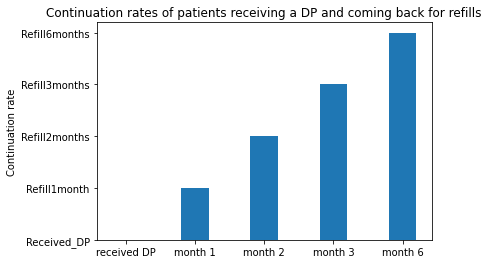

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Set the labels for the x-axis
labels = ['received DP', 'month 1', 'month 2', 'month 3', 'month 6']

# Set the values for each bar
values = ['Received_DP', 'Refill1month', 'Refill2months', 'Refill3months', 'Refill6months']

# Set the width of each bar
width = 0.4

# Set the position of the x-ticks (center of the bars as bar plots have a width)
x = np.arange(len(labels))

# Create the figure and the axis
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(x, values, width)

# Set the xticks and labels
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set the ylabel
ax.set_ylabel('Continuation rate')

# Set the title
ax.set_title('Continuation rates of patients receiving a DP and coming back for refills')

# Show the plot
plt.show()


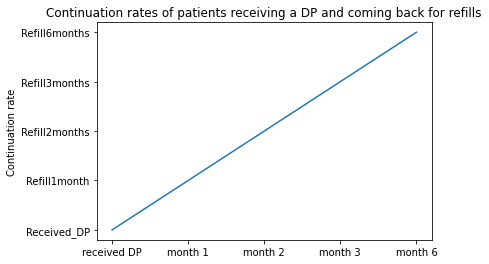

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Set the labels for the x-axis
labels = ['received DP', 'month 1', 'month 2', 'month 3', 'month 6']

# Set the values for each line
values = ['Received_DP', 'Refill1month', 'Refill2months', 'Refill3months', 'Refill6months']

# Set the position of the x-ticks
x = np.arange(len(labels))

# Create the figure and the axis
fig, ax = plt.subplots()

# Create a line plot
ax.plot(x, values)

# Set the xticks and labels
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set the ylabel
ax.set_ylabel('Continuation rate')

# Set the title
ax.set_title('Continuation rates of patients receiving a DP and coming back for refills')

# Show the plot
plt.show()

### c) Explain what the graphs are telling us about continuation rates and how the rates differ by key variables. 


The graphs that show the continuation rates of patients receiving a DP and coming back for refills can tell us how many patients have returned for refills over a certain period of time. The continuation rate is the percentage of patients who have returned for refills within a certain time period (e.g., 1 month, 2 months, 3 months, 6 months).

For example, if the continuation rate for the first month is 80%, this means that 80% of the patients who received a DP have returned for a refill within the first month. If the continuation rate for the second month is 70%, this means that 70% of the patients who received a DP and returned for a refill within the first month have also returned for a refill within the second month.

The graphs can also show us how the continuation rates differ by key variables, such as age, gender, or location. For example, if the continuation rates for male and female patients are significantly different, this may indicate that there are gender-specific factors that affect the likelihood of patients returning for refills.

To better understand the differences in continuation rates by key variables, you can create separate graphs for each variable or use multiple variables in a single graph. For example, you can create a bar chart with separate bars for male and female patients, or you can create a line plot with different lines for different age groups.

It is also important to consider any potential confounding variables that may affect the continuation rates. For example, if the continuation rates differ by location, it is important to consider whether there are differences in access to healthcare or other factors that may affect the likelihood of patients returning for refills.

### d) Suggest one intervention/improvement to the problem JHG is facing, referencing the data and any relevant literature on the topic. 

One potential intervention to improve the continuation rates of patients receiving a DP and coming back for refills is to implement a medication reminder system.

Medication reminder systems can help patients remember to take their medications as prescribed, which can improve adherence to treatment and lead to better health outcomes. There are various types of medication reminder systems, including phone apps, text message reminders, and pill boxes with alarms.

According to a review of the literature on the effectiveness of medication reminder systems, these interventions have been shown to improve medication adherence in a variety of populations, including patients with chronic diseases such as hypertension, diabetes, and HIV/AIDS.

To implement a medication reminder system, JHG could consider the following steps:

Identify the target population: Determine which patients are most likely to benefit from a medication reminder system, based on factors such as age, medication regimen, and adherence history.

Select an appropriate reminder system: Choose a reminder system that is suitable for the target population and the specific medications being taken. For example, a phone app may be more suitable for younger patients, while a pill box with alarms may be more suitable for older patients.

Educate patients about the reminder system: Provide patients with information about how to use the reminder system and the benefits of using it.

Evaluate the effectiveness of the reminder system: Monitor the continuation rates of patients using the reminder system and compare them to the continuation rates of patients not using the reminder system. This can help determine whether the reminder system is having a positive impact on adherence.

By implementing a medication reminder system, JHG may be able to improve the continuation rates of patients receiving a DP and coming back for refills, leading to better health outcomes for these patients.

### e)JHG decides to implement the intervention/improvement you suggested (i.e., from your answer in d on the previous slide). After one year, you see that the number of patients receiving DP has increased by 25% while those continuously refilling DP every month has increased by 30%.

#### 1. Can you say that the intervention/improvement caused the increase in DP use by 25% and continuous use by 30%? Explain why or why not. 


continuous use by 30%? Explain why or why not. 

It is not possible to definitively say that the intervention/improvement caused the increase in DP use by 25% and continuous use by 30% without conducting a controlled study.

A controlled study is a type of research study that compares the outcomes of an intervention or treatment to a control group, which is a group of individuals who do not receive the intervention. By comparing the outcomes of the intervention group to the control group, researchers can determine whether the intervention had a significant effect on the outcome.

In this case, a controlled study would involve randomly assigning patients to either the intervention group (receiving the medication reminder system) or the control group (not receiving the medication reminder system). The outcomes of the two groups could then be compared to determine whether the intervention had a significant impact on the number of patients receiving DP and the number of patients continuously refilling DP every month.

Without a controlled study, it is not possible to determine whether the increase in DP use and continuous use was caused by the intervention or by other factors. There may be other variables that contributed to the increase, such as changes in healthcare policies or changes in the availability of DP.

It is also important to consider the potential for bias in the data. If the patients who received the medication reminder system were more likely to use DP and refill it consistently, this could affect the results of the study.

In conclusion, while the increase in DP use and continuous use may be related to the intervention/improvement, it is not possible to definitively say that the intervention caused the increase without conducting a controlled study to control for other variables and potential biases.

#### 2. Can you tell us what would be a better way (if at all) to assess the effectiveness of your intervention? 

To assess the effectiveness of the medication reminder system intervention in a more rigorous and objective manner, it would be better to conduct a controlled study.

A controlled study allows researchers to control for other variables that may affect the outcome, such as changes in healthcare policies or changes in the availability of DP. It also allows for the comparison of the outcomes of the intervention group to a control group, which helps to determine whether the intervention had a significant impact on the outcome.

To conduct a controlled study, researchers could randomly assign patients to either the intervention group (receiving the medication reminder system) or the control group (not receiving the medication reminder system). The outcomes of the two groups could then be compared to determine whether the intervention had a significant impact on the number of patients receiving DP and the number of patients continuously refilling DP every month.

It is also important to consider the potential for bias in the data. To minimize bias, researchers should ensure that the patients in the intervention and control groups are similar in terms of their characteristics and the medications they are taking.

By conducting a controlled study, researchers can more confidently attribute any changes in the outcome (e.g., the number of patients receiving DP and the number of patients continuously refilling DP every month) to the intervention, rather than to other variables or biases.